# Import Libraries & Data

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline

In [ ]:
!pip install PyPDF4
import PyPDF4

!pip install pdfplumber
import pdfplumber

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
book1 = '/content/drive/MyDrive/DS/DS403: Digital Humanities/Harry Potter Book/1_Sorcerers_Stone.pdf'
book2 = '/content/drive/MyDrive/DS/DS403: Digital Humanities/Harry Potter Book/2_Chamber_of_Secrets.pdf'
book3 = '/content/drive/MyDrive/DS/DS403: Digital Humanities/Harry Potter Book/3_Prisoner_of_Azkaban.pdf'
book4 = '/content/drive/MyDrive/DS/DS403: Digital Humanities/Harry Potter Book/4_Goblet_of_Fire.pdf'
book5 = '/content/drive/MyDrive/DS/DS403: Digital Humanities/Harry Potter Book/5_Order_of_Phoenix.pdf'
book6 = '/content/drive/MyDrive/DS/DS403: Digital Humanities/Harry Potter Book/6_Half_Blood_Prince.pdf'
book7 = '/content/drive/MyDrive/DS/DS403: Digital Humanities/Harry Potter Book/7_Deathly_Hallows.pdf'

'''
book1 = '/Users/johnnybae/Documents/Academia/Chaminade/DS403-DigHum/HarryPotterBooks/1_Sorcerers_Stone.pdf'
book2 = '/Users/johnnybae/Documents/Academia/Chaminade/DS403-DigHum/HarryPotterBooks/2_Chamber_of_Secrets.pdf'
book3 = '/Users/johnnybae/Documents/Academia/Chaminade/DS403-DigHum/HarryPotterBooks/3_Prisoner_of_Azkaban.pdf'
book4 = '/Users/johnnybae/Documents/Academia/Chaminade/DS403-DigHum/HarryPotterBooks/4_Goblet_of_Fire.pdf'
book5 = '/Users/johnnybae/Documents/Academia/Chaminade/DS403-DigHum/HarryPotterBooks/5_Order_of_Phoenix.pdf'
book6 = '/Users/johnnybae/Documents/Academia/Chaminade/DS403-DigHum/HarryPotterBooks/6_Half_Blood_Prince.pdf'
book7 = '/Users/johnnybae/Documents/Academia/Chaminade/DS403-DigHum/HarryPotterBooks/7_Deathly_Hallows.pdf'
'''

In [ ]:
def extract_text_from_pdf(pdf_path):
    text = ''
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() or ''
    return text

In [ ]:
book1 = extract_text_from_pdf(book1)
book2 = extract_text_from_pdf(book2)
book3 = extract_text_from_pdf(book3)
book4 = extract_text_from_pdf(book4)
book5 = extract_text_from_pdf(book5)
book6 = extract_text_from_pdf(book6)
book7 = extract_text_from_pdf(book7)

# EDA

In [ ]:
def text_statistics(text):
    num_words = len(re.findall(r'\w+', text))
    num_sentences = len(re.findall(r'[.!?]', text))
    num_characters = len(text)
    return num_words, num_sentences, num_characters

# Create a DataFrame to store the statistics
data = {
    'Book': ['Book 1', 'Book 2', 'Book 3', 'Book 4', 'Book 5', 'Book 6', 'Book 7'],
    'Text': [book1, book2, book3, book4, book5, book6, book7]
}

df_books = pd.DataFrame(data)

# Calculate statistics for each book
df_books[['Num_Words', 'Num_Sentences', 'Num_Characters']] = df_books['Text'].apply(lambda x: text_statistics(x)).apply(pd.Series)

# Display the statistics
print(df_books[['Book', 'Num_Words', 'Num_Sentences', 'Num_Characters']])

     Book  Num_Words  Num_Sentences  Num_Characters
0  Book 1      80732           6656          436016
1  Book 2      92974           8438          515195
2  Book 3     111618           9256          622076
3  Book 4     197374          15190         1096329
4  Book 5     276585          25755         1536572
5  Book 6     174771          11801          972824
6  Book 7     193763          17874         1131257


# **Word Cloud**

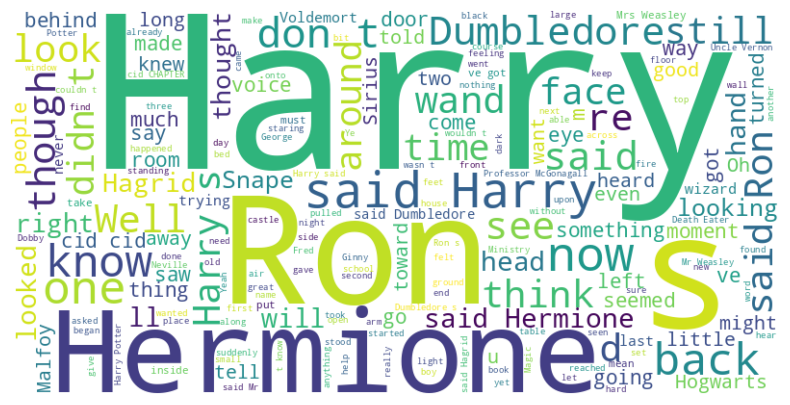

In [ ]:
combined_text = " ".join(df_books['Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=200, contour_color='black', contour_width=1).generate(combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axis details
plt.show()

In [ ]:
from collections import Counter

combined_text = " ".join(df_books['Text'])
cleaned_text = re.findall(r'\b\w+\b', combined_text.lower())
word_counts = Counter(cleaned_text)

print("Words shown in the word cloud (with whole number frequencies):\n")
for word, freq in word_counts.most_common(200):
  print(f"{word}: {freq}")

Words shown in the word cloud (with whole number frequencies):

the: 51489
and: 27373
to: 26631
he: 21917
of: 21790
a: 20918
harry: 18043
was: 15435
s: 14802
you: 14517
it: 14426
said: 14325
his: 14147
i: 13472
in: 12669
that: 10757
had: 9998
at: 8628
t: 7833
as: 7487
on: 6968
him: 6924
they: 6697
with: 6423
ron: 6259
but: 6118
for: 5636
her: 5456
not: 5326
she: 5197
hermione: 5182
what: 4810
be: 4572
out: 4410
up: 4374
all: 4315
were: 4189
we: 4143
them: 4126
have: 4122
from: 4084
there: 3773
into: 3390
who: 3255
dumbledore: 3238
been: 3227
this: 3225
back: 3187
so: 3135
is: 3028
me: 2844
could: 2788
no: 2775
one: 2710
an: 2659
now: 2651
if: 2648
then: 2633
their: 2541
about: 2490
know: 2490
over: 2385
like: 2384
down: 2346
looked: 2325
when: 2317
do: 2306
just: 2295
would: 2256
by: 2232
did: 2231
around: 2227
your: 2134
ve: 2133
very: 2074
d: 2071
got: 2059
can: 2026
hagrid: 2018
are: 2008
professor: 2008
re: 2000
my: 1973
don: 1971
well: 1966
again: 1910
see: 1909
more: 1904
snape: 

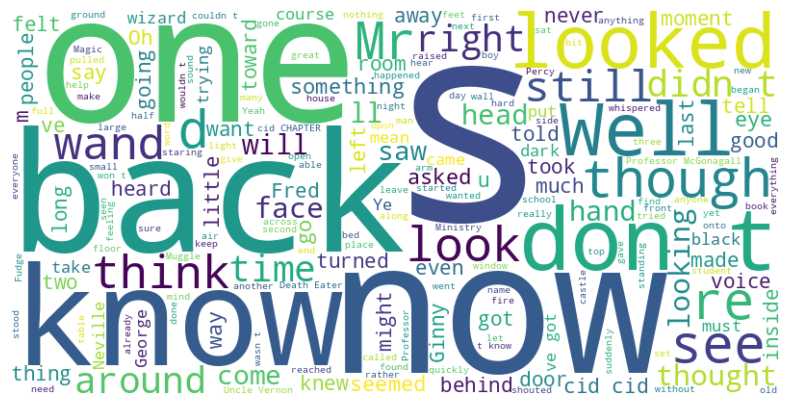

In [ ]:
from wordcloud import STOPWORDS

custom_stopwords = set([
    'harry', 'potter', 'hermione', 'ron', 'dumbledore', 'voldemort',
    'hogwarts', 'snape', 'malfoy', 'hagrid', 'gryffindor', 'slytherin',
    'weasley', 'draco', 'sirius', 'lupin', 'dobby', 'hedwig', 'lord',
    'he', 'she', 'they', 'him', 'her', 'we', 'it', 'you', 'his', 'their', 'said'
])

stopwords = STOPWORDS.union(custom_stopwords)

combined_text = " ".join(df_books['Text'])
cleaned_text = re.findall(r'\b\w+\b', combined_text.lower())  # Keeps only words (ignores punctuation)
word_counts2 = Counter(word for word in cleaned_text if word not in stopwords)


wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis',
                      max_words=200, stopwords=stopwords, contour_color='black',
                      contour_width=1).generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
print("Words shown in the word cloud (with whole number frequencies):\n")
for word, freq in word_counts2.most_common(200):
    print(f"{word}: {freq}")

Words shown in the word cloud (with whole number frequencies):

s: 14802
t: 7833
back: 3187
one: 2710
now: 2651
know: 2490
looked: 2325
around: 2227
ve: 2133
d: 2071
got: 2059
professor: 2008
re: 2000
don: 1971
well: 1966
see: 1909
though: 1804
looking: 1766
145: 1766
cid: 1765
ll: 1759
time: 1722
think: 1722
still: 1703
right: 1643
wand: 1624
eyes: 1593
face: 1569
going: 1452
look: 1449
voice: 1445
go: 1426
didn: 1410
m: 1383
will: 1376
head: 1350
room: 1347
come: 1331
door: 1304
mr: 1280
thought: 1259
something: 1190
saw: 1186
hand: 1157
never: 1134
way: 1127
behind: 1120
away: 1109
good: 1096
told: 1087
two: 1086
seemed: 1085
asked: 1070
last: 1063
turned: 1056
long: 1039
dark: 1038
us: 1027
much: 1016
black: 1010
oh: 993
toward: 991
little: 990
even: 986
want: 984
first: 983
knew: 975
tell: 957
let: 943
made: 936
heard: 932
people: 921
left: 917
yes: 906
fred: 903
really: 897
mrs: 894
say: 882
moment: 874
felt: 873
great: 865
might: 840
front: 794
three: 781
george: 769
neville: 76

# **Sentiment Analysis**

In [ ]:
from textblob import TextBlob

def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

df_books['Sentiment'] = df_books['Text'].apply(calculate_sentiment)

print(df_books[['Book', 'Sentiment']])

     Book  Sentiment
0  Book 1   0.050345
1  Book 2   0.047482
2  Book 3   0.034237
3  Book 4   0.053348
4  Book 5   0.039489
5  Book 6   0.060747
6  Book 7   0.050751


- Book 1   Neutral
- Book 2   Neutral
- Book 3   Negative
- Book 4   Neutral
- Book 5   Negative
- Book 6   Positive
- Book 7   Neutral
- I disagree with the outcome of this analysis

In [ ]:
emotion_words = {
    'Joy': [
        'happy', 'joy', 'pleasure', 'delight', 'cheerful', 'elated', 'excited',
        'content', 'gleeful', 'jubilant', 'thrilled', 'grateful', 'blissful',
        'radiant', 'wonderful', 'satisfied', 'ecstatic', 'overjoyed',
        'bubbly', 'optimistic', 'hopeful', 'lighthearted'
    ],
    'Trust': [
        'trust', 'reliable', 'loyal', 'faithful', 'secure', 'dependable',
        'confident', 'assured', 'reassured', 'believable', 'honest',
        'trustworthy', 'safe', 'sincere', 'faith', 'committed',
        'faithful', 'steadfast', 'truthful', 'constant'
    ],
    'Fear': [
        'fear', 'afraid', 'scared', 'terrified', 'anxious', 'frightened',
        'horrified', 'alarmed', 'panic', 'dread', 'worried', 'nervous',
        'apprehensive', 'intimidated', 'shocked', 'timid',
        'paranoid', 'concerned', 'distressed', 'helpless', 'vulnerable'
    ],
    'Surprise': [
        'surprise', 'astonished', 'amazed', 'stunned', 'startled', 'shocked',
        'unexpected', 'unforeseen', 'curious', 'wonder', 'marvel',
        'bewildered', 'flabbergasted', 'dumbfounded', 'incredulous',
        'astounded', 'bewildered', 'taken aback', 'unsettled', 'impressed'
    ],
    'Sadness': [
        'sad', 'unhappy', 'sorrow', 'grief', 'despair', 'depressed',
        'heartbroken', 'melancholy', 'gloomy', 'disappointed', 'mournful',
        'downcast', 'desolate', 'forlorn', 'dismal', 'painful',
        'sorrowful', 'lamenting', 'woeful', 'regretful', 'heavy-hearted'
    ],
    'Disgust': [
        'disgust', 'revolting', 'nauseating', 'sickening', 'repulsive',
        'offensive', 'abominable', 'repugnant', 'detestable', 'loathsome',
        'distasteful', 'gross', 'icky', 'yucky', 'repellent',
        'abhorrent', 'displeased', 'nasty', 'vile', 'foul'
    ],
    'Anger': [
        'anger', 'mad', 'fury', 'rage', 'irritated', 'enraged', 'exasperated',
        'frustrated', 'indignant', 'wrath', 'annoyed', 'infuriated',
        'provoked', 'displeased', 'outraged', 'hostile',
        'vengeful', 'furious', 'boiling', 'seething', 'fuming'
    ],
    'Anticipation': [
        'anticipation', 'expectation', 'hopeful', 'waiting', 'eager',
        'curiosity', 'excitement', 'optimistic', 'looking forward',
        'prepared', 'impatient', 'futuristic', 'watchful',
        'suspenseful', 'anxious', 'apprehensive', 'foreboding',
        'yearning', 'wishing', 'dreaming', 'speculating'
    ],
}

In [ ]:
def analyze_emotions(text):
    emotion_counts = {emotion: 0 for emotion in emotion_words.keys()}
    words = re.findall(r'\w+', text.lower())

    for word in words:
        for emotion, keywords in emotion_words.items():
            if word in keywords:
                emotion_counts[emotion] += 1
    return emotion_counts

df_books['Emotions'] = df_books['Text'].apply(analyze_emotions)

emotions_df = pd.DataFrame(df_books['Emotions'].tolist())
emotions_df['Book'] = df_books['Book']

print(emotions_df)

   Joy  Trust  Fear  Surprise  Sadness  Disgust  Anger  Anticipation    Book
0   36     31    89        57       14       25     44            36  Book 1
1   61     33    80        57       16       26     49            51  Book 2
2   72     31   139        71       16       25     75            54  Book 3
3   87     72   225       137       38       37    144           131  Book 4
4  139     76   308       151       59       51    217           169  Book 5
5  100     89   174       142       50       30    107           109  Book 6
6  105     99   226       104       54       19    136            83  Book 7


In [ ]:
def analyze_emotions(text):
    emotion_counts = {emotion: 0 for emotion in emotion_words.keys()}
    words = re.findall(r'\w+', text.lower())

    for word in words:
        for emotion, keywords in emotion_words.items():
            if word in keywords:
                emotion_counts[emotion] += 1
    return emotion_counts

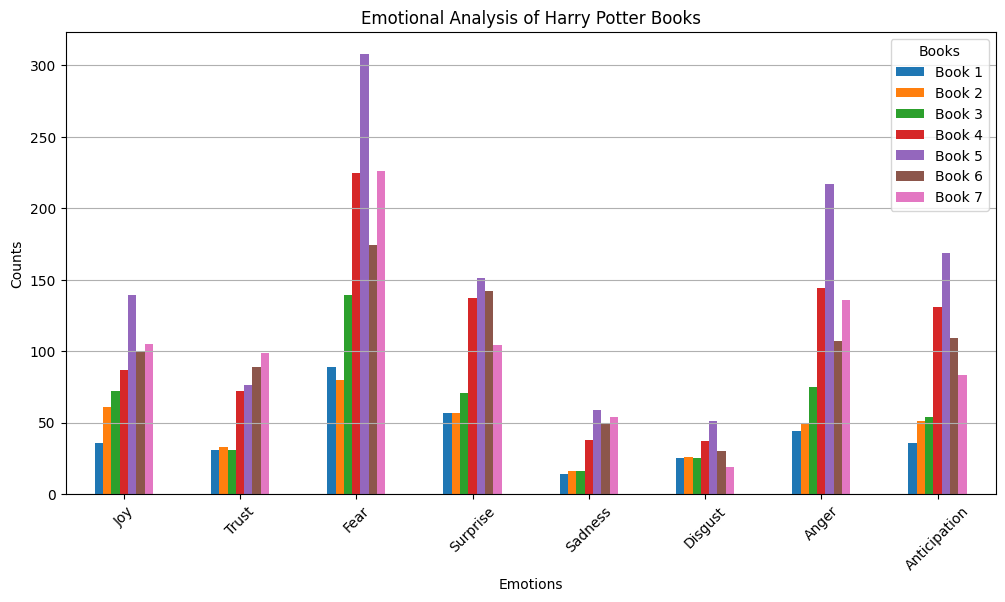

In [ ]:

def plot_emotions_comparison(emotions_df):
    emotions_df.set_index('Book').T.plot(kind='bar', figsize=(12, 6))
    plt.title('Emotional Analysis of Harry Potter Books')
    plt.xlabel('Emotions')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.legend(title='Books')
    plt.grid(axis='y')
    plt.show()

plot_emotions_comparison(emotions_df)

In [ ]:
import plotly.express as px

emotions_df = pd.DataFrame({
    'Joy': [36, 61, 72, 87, 139, 100, 105],
    'Trust': [31, 33, 31, 72, 76, 89, 99],
    'Fear': [89, 80, 139, 225, 308, 174, 226],
    'Surprise': [57, 57, 71, 137, 151, 142, 104],
    'Sadness': [14, 16, 16, 38, 59, 50, 54],
    'Disgust': [25, 26, 25, 37, 51, 30, 19],
    'Anger': [44, 49, 75, 144, 217, 107, 136],
    'Anticipation': [36, 51, 54, 131, 169, 109, 83],
    'Book': ['Book 1', 'Book 2', 'Book 3', 'Book 4', 'Book 5', 'Book 6', 'Book 7']
})

emotions_long = emotions_df.melt(id_vars='Book', var_name='Emotion', value_name='Counts')

emotions_long['Book_Size'] = 1

dark_colors = [
    "#2F4F4F",  # Dark Slate Gray
    "#8B4513",  # Saddle Brown
    "#4B0082",  # Indigo
    "#556B2F",  # Dark Olive Green
    "#483D8B",  # Dark Slate Blue
    "#8B0000",  # Dark Red
    "#2E8B57",  # Sea Green
    "#6B8E23"   # Olive Drab
]

fig = px.sunburst(
    emotions_long,
    path=['Book', 'Emotion'],
    values='Counts',
    branchvalues='total',
    color='Emotion',
    color_discrete_sequence = dark_colors,
    title='Emotional Analysis of Harry Potter Books'
)

fig.show()

# **Spell Analysis**

In [ ]:
# Data: spell usage counts in each book
spells = {
    "Spell": [
        "Expecto Patronum", "Protego", "Diffindo", "Bombarda", "Reducto",
        "Confringo", "Stupefy", "Obliviate", "Expelliarmus", "Sectumsempra",
        "Imperio", "Crucio", "Avada Kedavra"
    ],
    "Book 1": [2, 0, 1, 0, 0, 0, 3, 0, 12, 0, 0, 0, 0],
    "Book 2": [3, 1, 2, 1, 3, 0, 2, 0, 7, 0, 1, 0, 0],
    "Book 3": [20, 4, 0, 1, 1, 1, 5, 1, 15, 0, 0, 0, 1],
    "Book 4": [10, 8, 4, 2, 5, 3, 10, 1, 18, 0, 2, 1, 2],
    "Book 5": [15, 12, 5, 3, 7, 2, 14, 2, 22, 0, 4, 3, 1],
    "Book 6": [8, 9, 2, 2, 6, 4, 8, 1, 9, 11, 2, 2, 3],
    "Book 7": [9, 14, 6, 5, 4, 9, 13, 3, 17, 2, 5, 5, 4]
}

In [ ]:
# Convert to DataFrame
spellCount = pd.DataFrame(spells)

# Set the "Spell" column as the index for easier plotting
spellCount.set_index("Spell", inplace=True)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
light_to_dark = LinearSegmentedColormap.from_list("light_to_dark", ["#ADD8E6", "#8B0000"])
# OR
red_green = LinearSegmentedColormap.from_list(
    "red_green", ["#9E1B32", "#4B8B3B", "#006400"])

<Figure size 1200x800 with 0 Axes>

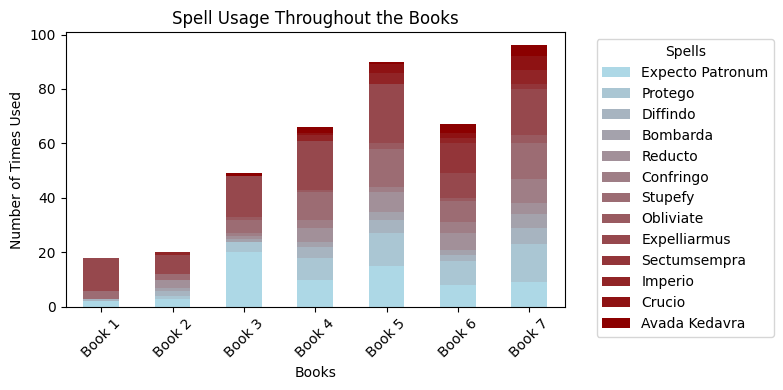

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
spellCount.T.plot(kind="bar", stacked=True, cmap=light_to_dark, figsize=(8, 4))
plt.title("Spell Usage Throughout the Books")
plt.xlabel("Books")
plt.ylabel("Number of Times Used")
plt.legend(title="Spells", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()